### Q4: Decision Tree and Random Forest – 15 Marks
Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to
one of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal
length, sepal width, petal length, and petal width.
1. Visualize the distribution of each feature and the class distribution.
2. Encode the categorical target variable (species) into numerical values.
3. Split the dataset into training and testing sets (use an appropriate ratio).
4. Decision Tree Model
    - Build a decision tree classifier using the training set.
    - Visualize the resulting decision tree.
    - Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).
5. Random Forest Model
   - Build a random forest classifier using the training set.
   - Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary.
   - Make predictions on the testing set and evaluate the model's performance using appropriate metrics and compare it with the decision tree model

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Loading the data Frame
iris = load_iris()

### Doing Data Preprocessing steps 

In [5]:
# Created the data frame using the loaded IRIS data set
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
# Updating the species column in the data set by mapping the categorical values with there corresponding value
df['species'] = [iris.target_names[i] for i in iris.target]

In [7]:
# Printing the column info, for checking the column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Printing the head of the dataset to verify the feature names and the type of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualize the distribution of each feature and the class distribution.
- For visualizing distribution we're using Histograms

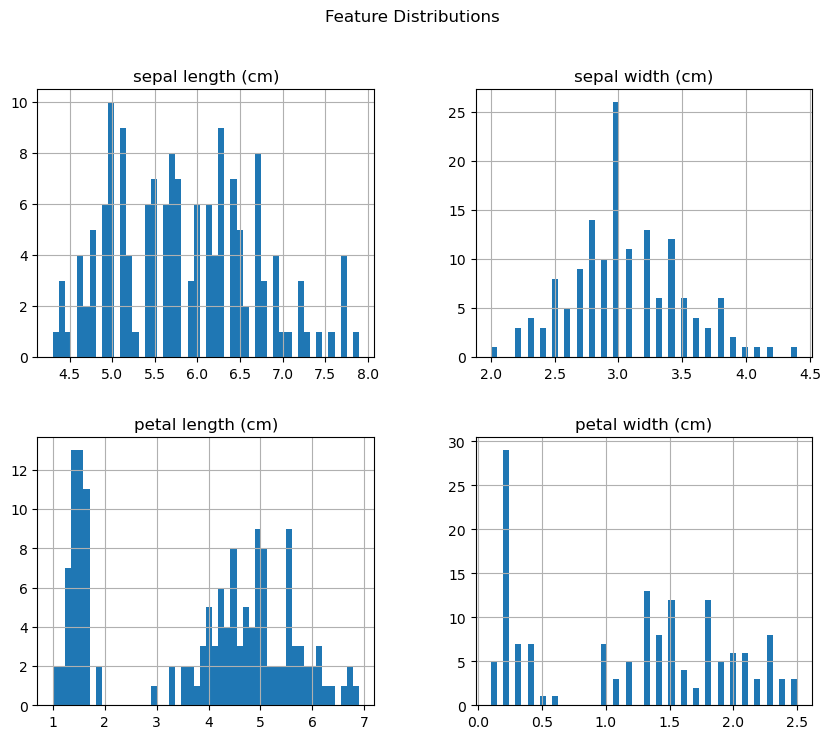

In [12]:
# Using Matplot library's Histograms to check the distribution of features
df.hist(bins=50, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

### For class distribution we'll use scatter plot as well as bar plot
- Scatter plot will help us understand the relation between species and their sepal length and sepal width
- Bar plot will help us understanding the distribution of the species samples

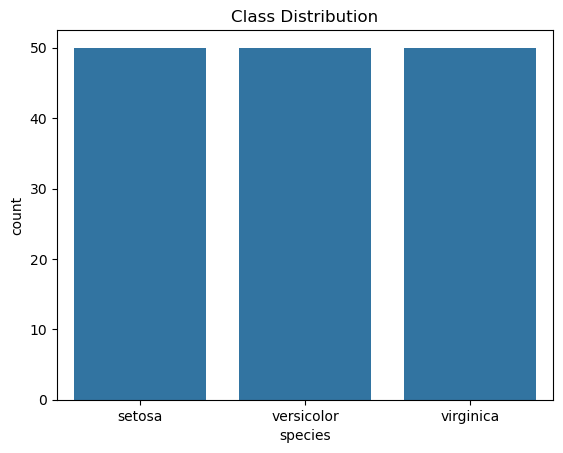

In [13]:
# Visulaize the count plot first using seaborn countplot
sns.countplot(x = 'species', data=df)
plt.title("Class Distribution")
plt.show()

From the above visualization, we can clearly say that all three species have the same number of samples in the set (50 each)

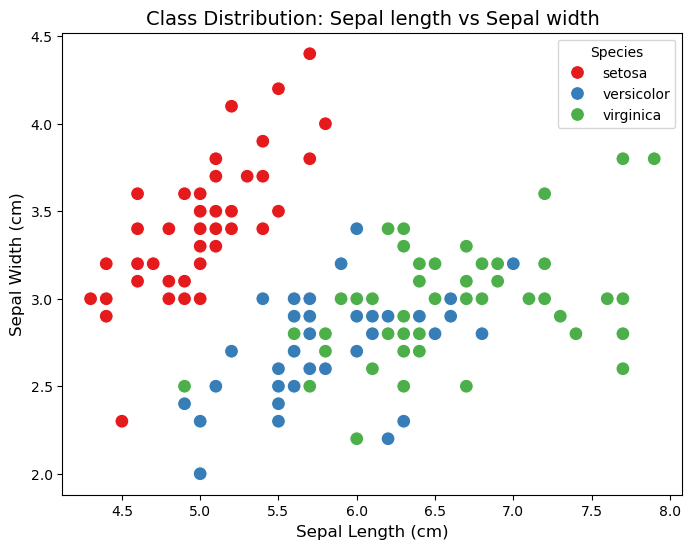

In [16]:
# Visualizing the distribution of species based on sepal length and sepal width may give use full insights
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="species", palette="Set1", s=100)

# adding the titles
plt.title("Class Distribution: Sepal length vs Sepal width", fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend(title='Species')

plt.show()

### 2. Encode the categorical target variable (species) into numerical values.

In [19]:
# Import the One Hot Encoder from sklearn library to encode categorical values to numerical values
from sklearn.preprocessing import OrdinalEncoder

In [21]:
# Using Ordinal encoder to encode the categorical values into numerical values
ordinal_encoder = OrdinalEncoder()
df["species_code"] = ordinal_encoder.fit_transform(df[["species"]])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_code
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


In [23]:
df_copy = df.drop(["species"], axis=1)

In [24]:
df_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_code
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 3. Split the dataset into training and testing sets (use an appropriate ratio).

For splitting the data set into test and train sets we use sklearn's train_test_split class

In [26]:
# For splitting data in test and train split lets create X and y sets from the data set

X = df_copy.drop(["species_code"], axis=1)
y = df_copy["species_code"]

In [28]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

# We've used 70:30 train and test split ratio, which is considered ideal for classification problems
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Decision Tree Model
    - Build a decision tree classifier using the training set.
    - Visualize the resulting decision tree.
    - Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).